In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_context("talk")

from sqlalchemy import create_engine, text

pd.set_option("display.max_columns", 22)

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2023*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [2]:
import plotly

plotly.__version__

'5.9.0'

In [3]:
df_melb = pd.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv"
)
df_melb[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df_melb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



#### 1.

**creacion de base de datos**

In [5]:
engine = create_engine(
    "sqlite:///DataBase.sqlite3", echo=True
)  # create database file called 'DataBase.sqlite3' where
# the two tables are going
# to be stored.

### 2.
**Ingestando las tablas**

In [6]:
df_airbnb = pd.read_csv("airbnb_price_by_zipcode.csv")
df_airbnb.head(200)

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.000000,1,NaN,NaN
1,2134.0,50.000000,1,NaN,NaN
2,2582.0,104.000000,1,NaN,NaN
3,3000.0,150.504307,3367,918.738956,3407.204651
4,3001.0,132.500000,2,NaN,NaN
...,...,...,...,...,...
195,3767.0,215.666667,42,814.000000,2784.500000
196,3770.0,396.166667,24,1050.000000,3200.000000
197,3775.0,337.688889,45,733.166667,2800.000000
198,3777.0,271.256684,187,1278.512195,3802.187500


In [7]:
df_melb.to_sql(
    "melb_data", con=engine, if_exists="replace"
)  # create table named 'melb_data' into 'Database.sqlite3' file
df_airbnb.to_sql(
    "airbnb_data", con=engine, if_exists="replace"
)  # create table named 'airbnb_data'  into 'Database.sqlite3' file

2023-06-05 23:09:48,157 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2023-06-05 23:09:48,160 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 23:09:48,164 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2023-06-05 23:09:48,165 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 23:09:48,168 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-06-05 23:09:48,169 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 23:09:48,171 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melb_data")
2023-06-05 23:09:48,172 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 23:09:48,178 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-06-05 23:09:48,179 INFO sqlalchemy.engine.Engine [raw sql] ('melb_data',)
2023-06-05 23:09:48,181 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("

2023-06-05 23:09:48,853 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_data_index")
2023-06-05 23:09:48,854 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-05 23:09:48,856 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-06-05 23:09:48,857 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb_data',)
2023-06-05 23:09:48,863 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-05 23:09:48,864 INFO sqlalchemy.engine.Engine 
DROP TABLE airbnb_data
2023-06-05 23:09:48,865 INFO sqlalchemy.engine.Engine [no key 0.00114s] ()
2023-06-05 23:09:48,875 INFO sqlalchemy.engine.Engine COMMIT
2023-06-05 23:09:48,879 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-05 23:09:48,881 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_data (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb

247

### 3.
- cantidad de registros totales por ciudad.

In [8]:
query1 = "SELECT CouncilArea, COUNT(*) FROM melb_data GROUP BY CouncilArea"

In [9]:
with engine.connect() as con:
    rs = con.execute(text(query1))
    df_rs = pd.DataFrame(
        rs.fetchall()
    )  # inserting list of tuples (query return) into a DataFrame object for visualization
    for row in rs:
        print(row)

2023-06-05 23:09:48,976 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(*) FROM melb_data GROUP BY CouncilArea
2023-06-05 23:09:48,978 INFO sqlalchemy.engine.Engine [generated in 0.00178s] ()


In [10]:
df_rs.head(10)  # displaying result of query 1

,CouncilArea,COUNT(*)
0,None,1369
1,Banyule,594
2,Bayside,489
3,Boroondara,1160
4,Brimbank,424
5,Cardinia,8
6,Casey,38
7,Darebin,934
8,Frankston,53
9,Glen Eira,848


- cantidad de registros totales por barrio y ciudad.

In [11]:
query2 = "SELECT Suburb, CouncilArea, COUNT(*) FROM melb_data GROUP BY Suburb"

In [12]:
with engine.connect() as con:
    request2 = con.execute(text(query2))
    df_request2 = pd.DataFrame(
        request2.fetchall()
    )  # inserting list of tuples (query return) into a DataFrame object for visualization
    for row in request2:
        print(row)

2023-06-05 23:09:49,083 INFO sqlalchemy.engine.Engine SELECT Suburb, CouncilArea, COUNT(*) FROM melb_data GROUP BY Suburb
2023-06-05 23:09:49,085 INFO sqlalchemy.engine.Engine [generated in 0.00222s] ()


In [13]:
df_request2.head(20)

,Suburb,CouncilArea,COUNT(*)
0,Abbotsford,Yarra,56
1,Aberfeldie,Moonee Valley,44
2,Airport West,Moonee Valley,67
3,Albanvale,Brimbank,6
4,Albert Park,Port Phillip,69
5,Albion,Brimbank,41
6,Alphington,Darebin,34
7,Altona,Hobsons Bay,74
8,Altona Meadows,Hobsons Bay,6
9,Altona North,Hobsons Bay,56


### 4.
**Join**

In [14]:
query3 = """SELECT *

            FROM
                 melb_data
            LEFT JOIN airbnb_data ON
                melb_data.Postcode = airbnb_data.zipcode
         """

In [15]:
with engine.connect() as con:
    request3 = con.execute(text(query3))
    df_Joined = pd.DataFrame(
        request3.fetchall()
    )  # inserting list of tuples (query return) into a DataFrame object for visualization
    for row in request3:
        print(row)

2023-06-05 23:09:49,191 INFO sqlalchemy.engine.Engine SELECT *

            FROM
                 melb_data
            LEFT JOIN airbnb_data ON
                melb_data.Postcode = airbnb_data.zipcode
         
2023-06-05 23:09:49,195 INFO sqlalchemy.engine.Engine [generated in 0.00371s] ()


In [16]:
df_Joined[["zipcode", "Postcode"]].head(10)  # checking for succesful pairing

,zipcode,Postcode
0,3067.0,3067.0
1,3067.0,3067.0
2,3067.0,3067.0
3,3067.0,3067.0
4,3067.0,3067.0
5,3067.0,3067.0
6,3067.0,3067.0
7,3067.0,3067.0
8,3067.0,3067.0
9,3067.0,3067.0


In [17]:
df_Joined.columns

Index(['index', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'index',
       'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'],
      dtype='object')

In [18]:
len(df_Joined['Postcode'].unique()) # 13580

198

In [19]:
# A more robust checking

zipcode_postcode_matching = pd.DataFrame()
zipcode_postcode_matching["match"] = pd.Series(
    df_Joined["zipcode"] == df_Joined["Postcode"]
)

number_of_elements = zipcode_postcode_matching.shape[0]
number_of_matchs = zipcode_postcode_matching.loc[
    zipcode_postcode_matching["match"]
].shape[0]

print(f"Total number of elements: {number_of_elements}")
print(f"Total number of matchs: {number_of_matchs}")
zipcode_postcode_matching.loc[~zipcode_postcode_matching["match"]]

Total number of elements: 13580
Total number of matchs: 13560


,match
6817,False
6818,False
8717,False
8817,False
9549,False
10033,False
10576,False
10938,False
11032,False
11371,False


## Ejercicio 2 - Pandas: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

 
2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

# Inciso 1

In [20]:
df_melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [21]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

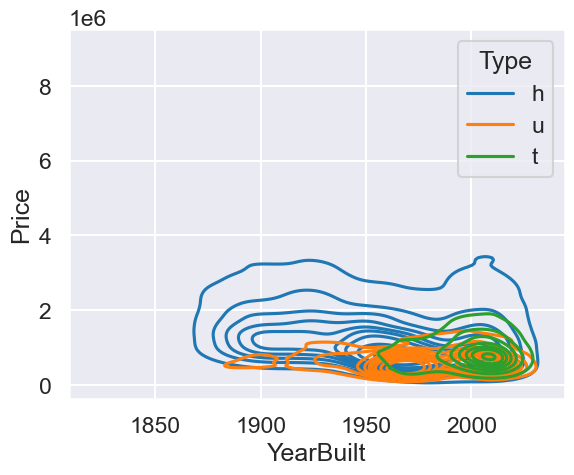

In [22]:
# let's see if there is any clear tendency for year built
sns.set_style("darkgrid")
sns.kdeplot(data=df_melb.loc[df_melb["YearBuilt"] > 1800], x="YearBuilt", y="Price", hue='Type')
plt.show()

In [23]:
# Type:
# - br - bedroom(s);
# - h - house,cottage,villa, semi,terrace;
# - u - unit, duplex; 
# - t - townhouse; dev site - development site;
# - res - other residential.

df_melb["Type"].unique()

array(['h', 'u', 't'], dtype=object)

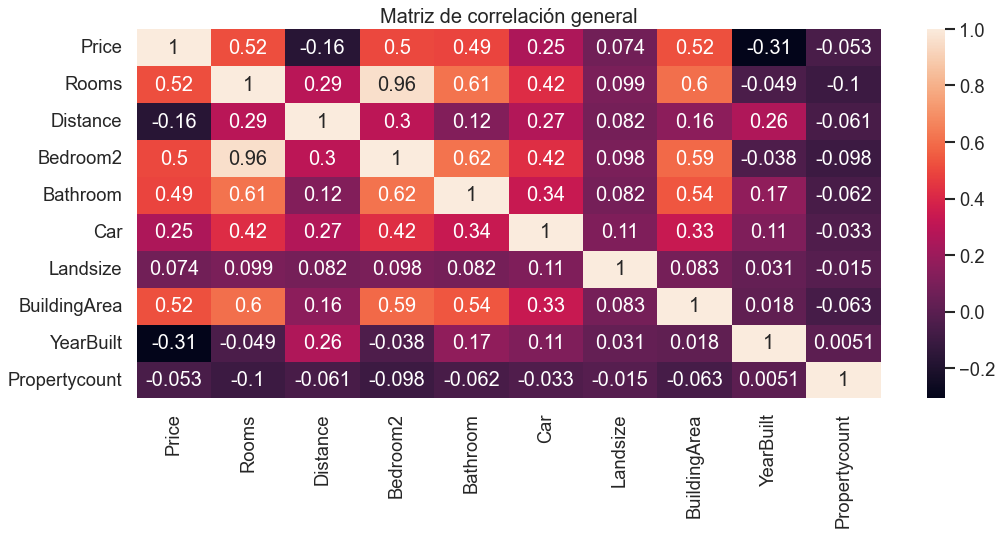

In [24]:
# let's try to choose the columns by looking at their correlation with price
list_of_col_names = [
    "Price",
    "Rooms",
    "Distance",
    "Bedroom2",
    "Bathroom",
    "Car",
    "Landsize",
    "BuildingArea",
    "YearBuilt",
    "Propertycount",
]

df_corr = df_melb[list_of_col_names].dropna().corr()
# df_corr = df_melb[list_of_col_names].loc[df_melb['Type'] == 't'].dropna().corr()

plt.figure(figsize=(15, 6), dpi=80)
sns.heatmap(df_corr, annot=True)
plt.title('Matriz de correlación general')
plt.show()

Del gráfico anterior, podemos ver que lo que más correlaciona con el precio es:
1. Rooms
2. BuildingArea
3. Bedroom2
4. Bathroom
5. YearBuilt
6. Car
7. Distance

`Propertycont` y `Landsize` están por debajo del 0.1 de correlación. En general, estas columnas correlacionan poco con el resto, así que no vamos a incluirlas por ahora. Hay que ver que BuildingArea no tenga demasiados NaN.

Por otro lado, como se vio en el gráfico de Price vs YearBuilt, mientras que el total no muestra una tendencia clara, las casas (Type `h`) alcanzan precios mayores que los otros tipos de propiedades. Esto implica que quizás valga la pena separar el análisis por grupos.

A continuación, hacemos el mismo mapa de calor para la matriz de correlación, pero tomando sólo la primera fila (las correlaciones con la columna de precio), para el data set general, y luego para el filtrado según categoría. Hacemos el gráfico de modo que las filas coincidan para todos los filtros, de modo de poder comparar cómo cambia la correlación general dentro de cada categoría.

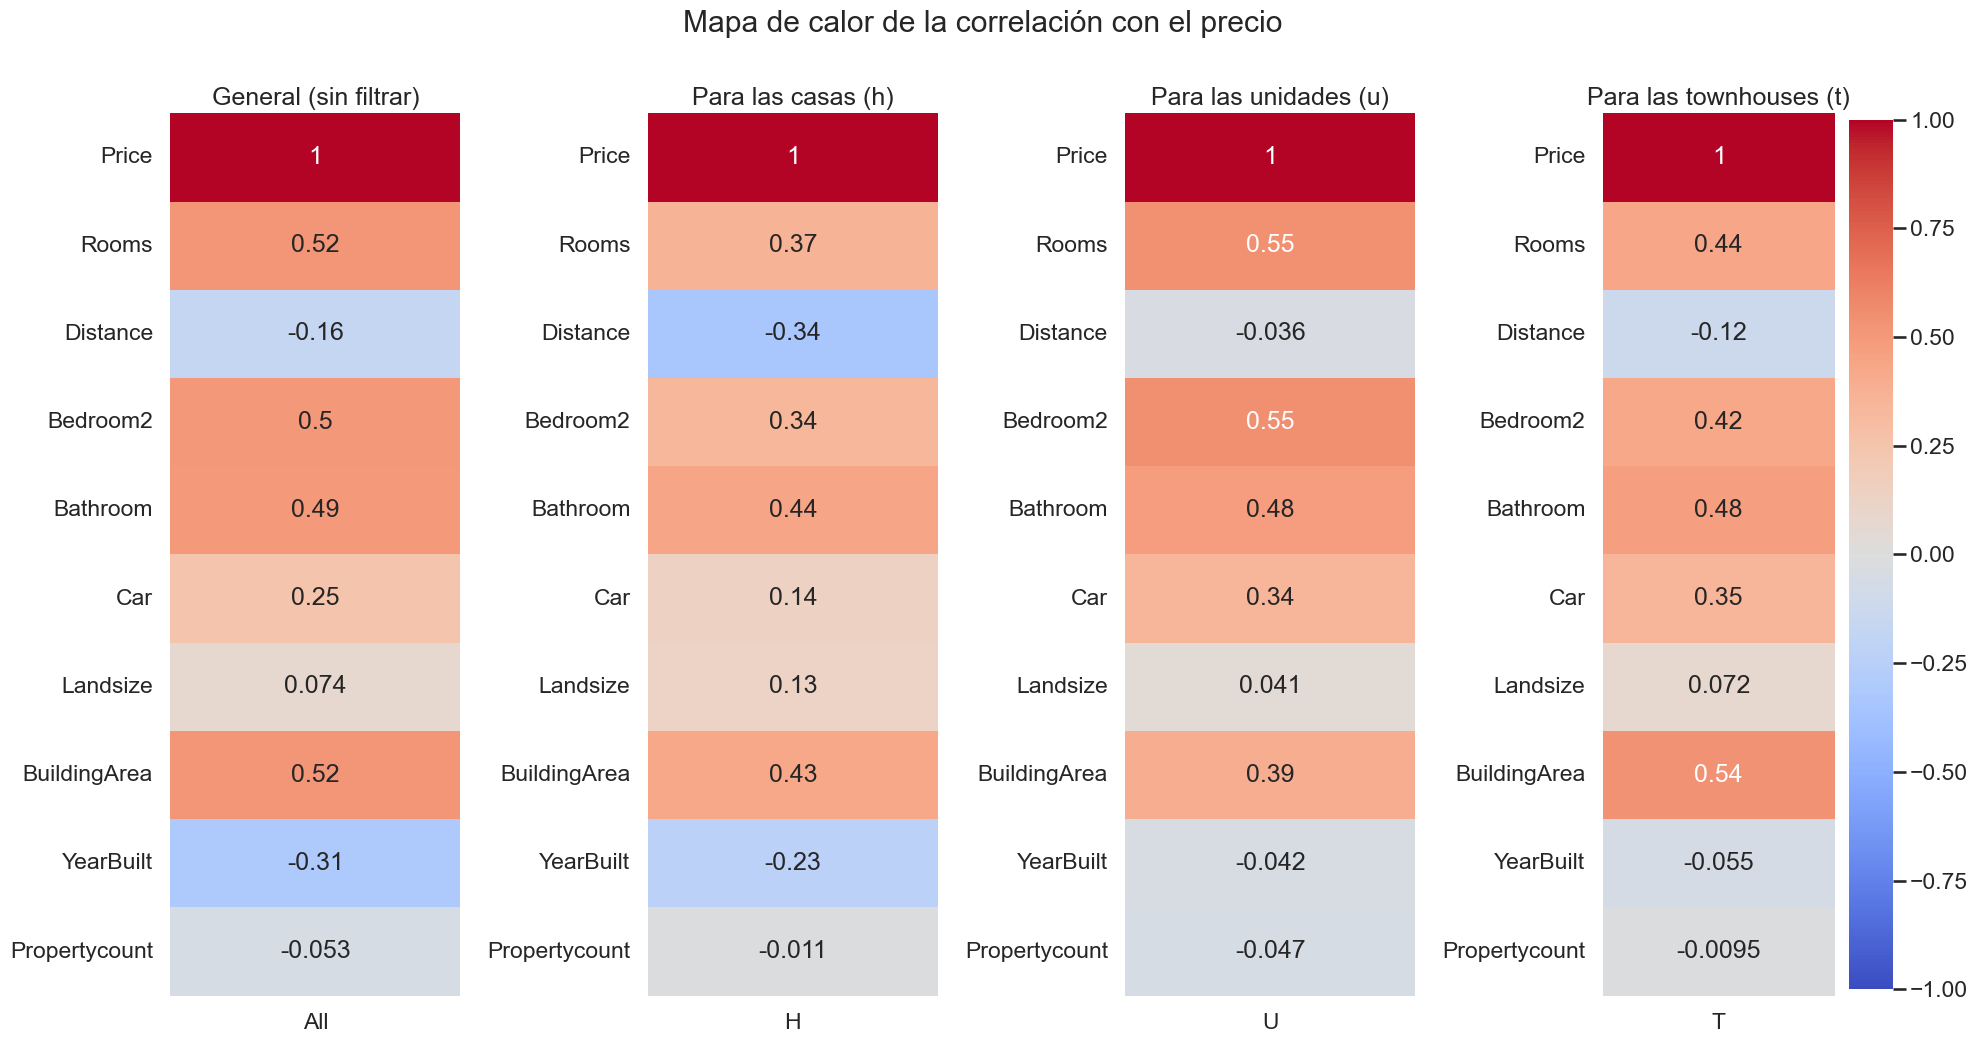

In [25]:
# correlation matrix without filtering
df_corr = df_melb[list_of_col_names].dropna().corr()

# correlation matrix for each type
df_corr_h = df_melb[list_of_col_names].loc[df_melb['Type'] == 'h'].dropna().corr()
df_corr_u = df_melb[list_of_col_names].loc[df_melb['Type'] == 'u'].dropna().corr()
df_corr_t = df_melb[list_of_col_names].loc[df_melb['Type'] == 't'].dropna().corr()

# assuming 'Price' is in list_of_col_names
price_corr = pd.DataFrame([df_corr.loc['Price'], df_corr_h.loc['Price'], df_corr_u.loc['Price'], df_corr_t.loc['Price']], 
                          index=['All', 'H', 'U', 'T']).T

fig, axs = plt.subplots(1, 4, figsize=(20, 10))  # creates a grid of 1 row and 4 columns

# the color map to use
color_map='coolwarm'
# I'm using this one, cause it's a diverging color map
# that emphasizes the distance to zero

sns.heatmap(price_corr[['All']], annot=True, ax=axs[0], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[0].set_title('General (sin filtrar)')

sns.heatmap(price_corr[['H']], annot=True, ax=axs[1], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[1].set_title('Para las casas (h)')

sns.heatmap(price_corr[['U']], annot=True, ax=axs[2], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[2].set_title('Para las unidades (u)')

sns.heatmap(price_corr[['T']], annot=True, ax=axs[3], cmap=color_map, cbar=True, vmin=-1, vmax=1)
axs[3].set_title('Para las townhouses (t)')

plt.tight_layout()  # Ensures that the subplots do not overlap
plt.suptitle('Mapa de calor de la correlación con el precio', y=1.05)
plt.show()

En el anterior gráfico podemos ver que:
1. `Rooms` sigue siendo importante para todos, pero mucho más para `u` que para `h` (quedando `t` al medio). 
2. `BuildingArea` también, pero es mucho más importante para `t` que para `u`, con `h` al medio.
3. `Bedroom2` sigue un comportamiento similar a `Rooms` en las tres categorías.
4. `Bathroom` es similarmente importante para todas.
5. `YearBuilt` parece ser relevante para las casas (`h`)
6. `Car` correlaciona menos con el precio para `h` que para el resto.
7. `Distance` correlaciona mucho más para `u` que para `h` (quedando `t` al medio).

Para ver mejor qué es importante para cada categoría, en lugar de ordernar las filas para que coincidan a través de las categorías de filtrado, las ordenamos según correlación decreciente.

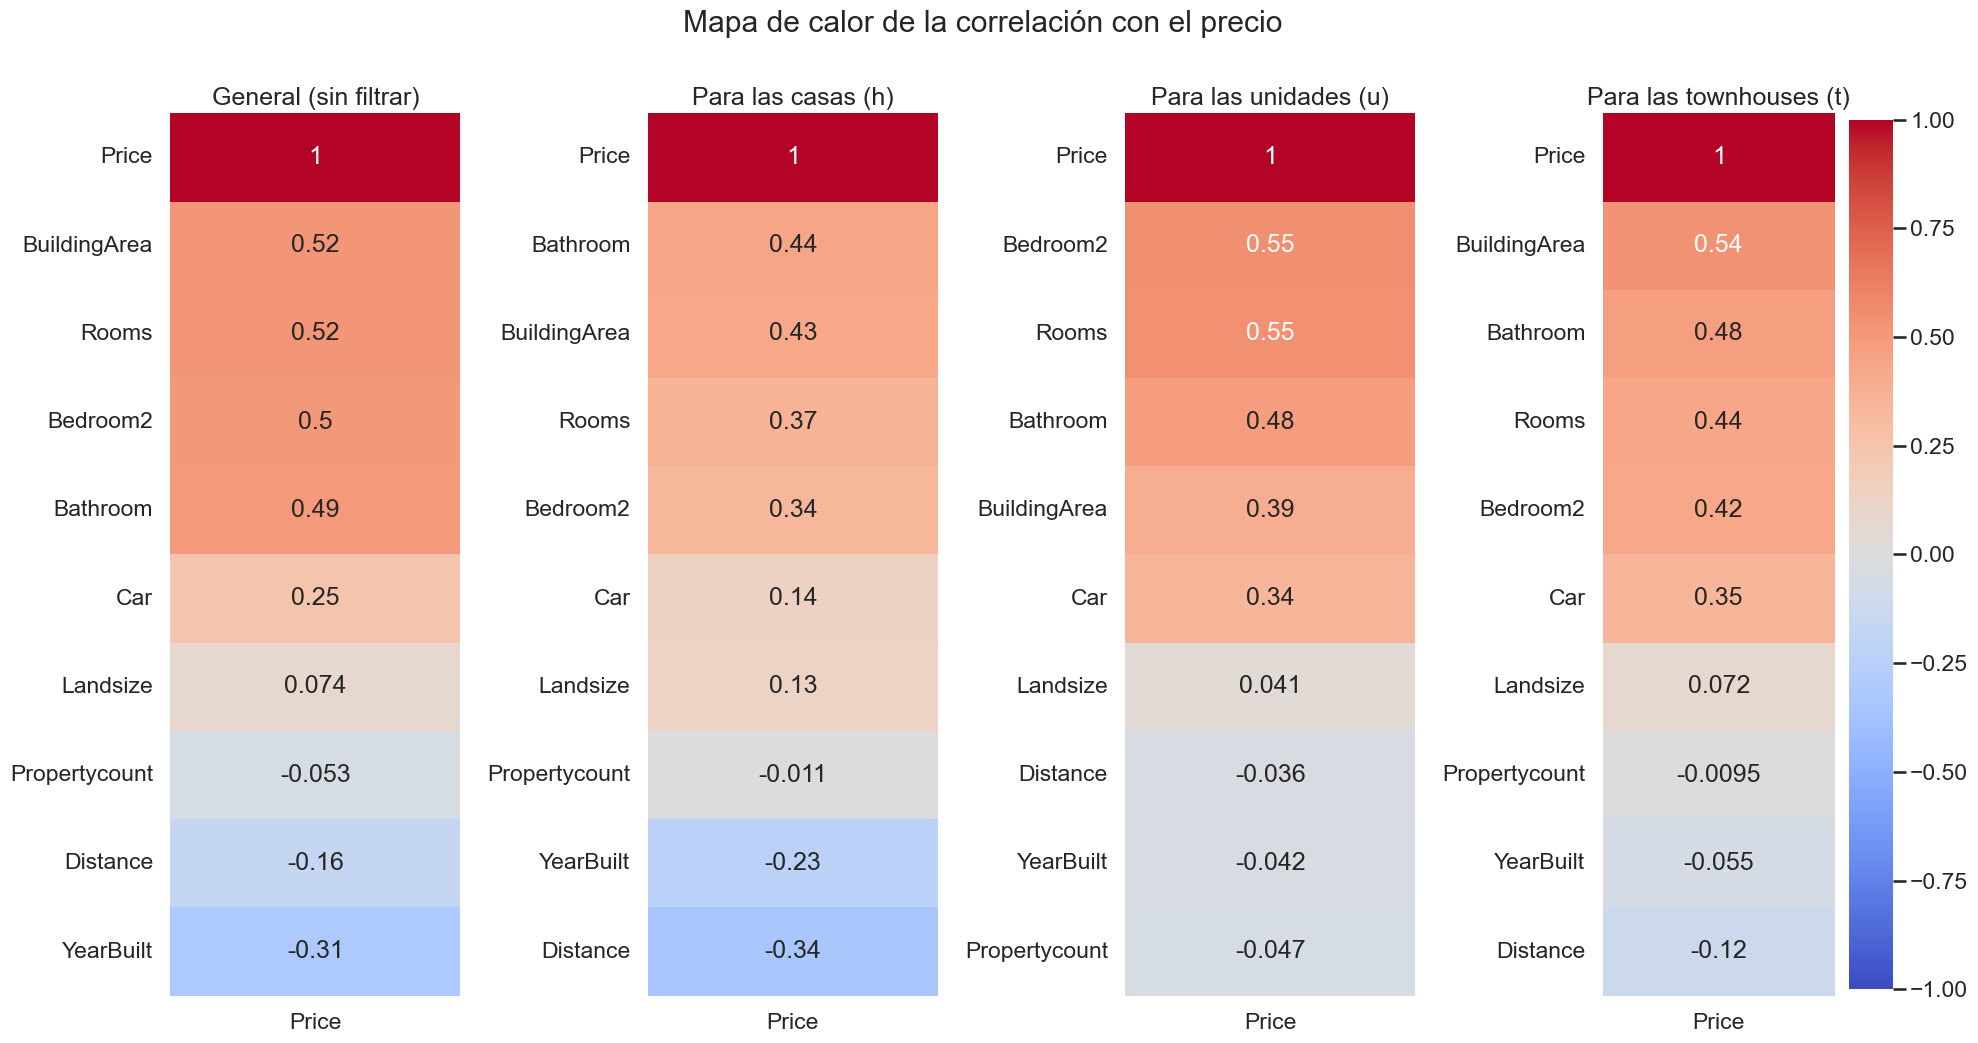

In [26]:
# correlation matrix without filtering
df_corr = df_melb[list_of_col_names].dropna().corr()

# correlation matrix for each type
df_corr_h = df_melb[list_of_col_names].loc[df_melb['Type'] == 'h'].dropna().corr()
df_corr_u = df_melb[list_of_col_names].loc[df_melb['Type'] == 'u'].dropna().corr()
df_corr_t = df_melb[list_of_col_names].loc[df_melb['Type'] == 't'].dropna().corr()

# assuming 'Price' is in list_of_col_names and sorting by 'Price' correlation
price_corr_all = df_corr.loc['Price'].sort_values(ascending=False)
price_corr_h = df_corr_h.loc['Price'].sort_values(ascending=False)
price_corr_u = df_corr_u.loc['Price'].sort_values(ascending=False)
price_corr_t = df_corr_t.loc['Price'].sort_values(ascending=False)

fig, axs = plt.subplots(1, 4, figsize=(20, 10))  # creates a grid of 1 row and 4 columns

# the color map to use
color_map='coolwarm'
# I'm using this one, cause it's a diverging color map
# that emphasizes the distance to zero

sns.heatmap(pd.DataFrame(price_corr_all), annot=True, ax=axs[0], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[0].set_title('General (sin filtrar)')

sns.heatmap(pd.DataFrame(price_corr_h), annot=True, ax=axs[1], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[1].set_title('Para las casas (h)')

sns.heatmap(pd.DataFrame(price_corr_u), annot=True, ax=axs[2], cmap=color_map, cbar=False, vmin=-1, vmax=1)
axs[2].set_title('Para las unidades (u)')

sns.heatmap(pd.DataFrame(price_corr_t), annot=True, ax=axs[3], cmap=color_map, cbar=True, vmin=-1, vmax=1)
axs[3].set_title('Para las townhouses (t)')

plt.tight_layout()  # Ensures that the subplots do not overlap
plt.suptitle('Mapa de calor de la correlación con el precio', y=1.05)
plt.show()

Aquí, rápidamente podemos identificar que las columnas con baja correlación con el precio son (tomo $0.1$ como umbral):
- general (sin filtrar): `Landsize` y `Propertycount`;
- `h`: `Propertycount`;
- `u`: `Landsize`, `Distance`, `YearBuilt` y `Propertycount`;
- `t`: `Landsize`, `YearBuilt` y `Propertycount`.

Esto implica que la única columna que podemos eliminar en una primera selección es `Propertycount`. El resto importa en alguna categoría.

Hagamos una primera selección basado en lo anterior

In [27]:
relevant_columns = [
    "Postcode",
    "Price",
    "CouncilArea",
    "Suburb",
    "Rooms",
    'BuildingArea',
    "Type",
    "Bedroom2",
    "Bathroom",
    "YearBuilt",
    "Car",
    'Distance',
    "Landsize",
]

In [28]:
df_relevant_columns = df_melb[relevant_columns]
df_relevant_columns.columns

Index(['Postcode', 'Price', 'CouncilArea', 'Suburb', 'Rooms', 'BuildingArea',
       'Type', 'Bedroom2', 'Bathroom', 'YearBuilt', 'Car', 'Distance',
       'Landsize'],
      dtype='object')

In [29]:
df_relevant_columns.describe()  # first look at numerical variables (ignore Postcode column)

,Postcode,Price,Rooms,BuildingArea,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize
count,13580.000000,1.358000e+04,13580.000000,7130.000000,13580.000000,13580.000000,8205.000000,13518.000000,13580.000000,13580.000000
mean,3105.301915,1.075684e+06,2.937997,151.967650,2.914728,1.534242,1964.684217,1.610075,10.137776,558.416127
std,90.676964,6.393107e+05,0.955748,541.014538,0.965921,0.691712,37.273762,0.962634,5.868725,3990.669241
min,3000.000000,8.500000e+04,1.000000,0.000000,0.000000,0.000000,1196.000000,0.000000,0.000000,0.000000
25%,3044.000000,6.500000e+05,2.000000,93.000000,2.000000,1.000000,1940.000000,1.000000,6.100000,177.000000
50%,3084.000000,9.030000e+05,3.000000,126.000000,3.000000,1.000000,1970.000000,2.000000,9.200000,440.000000
75%,3148.000000,1.330000e+06,3.000000,174.000000,3.000000,2.000000,1999.000000,2.000000,13.000000,651.000000
max,3977.000000,9.000000e+06,10.000000,44515.000000,20.000000,8.000000,2018.000000,10.000000,48.100000,433014.000000


Visualicemos los outliers utilizando boxplots

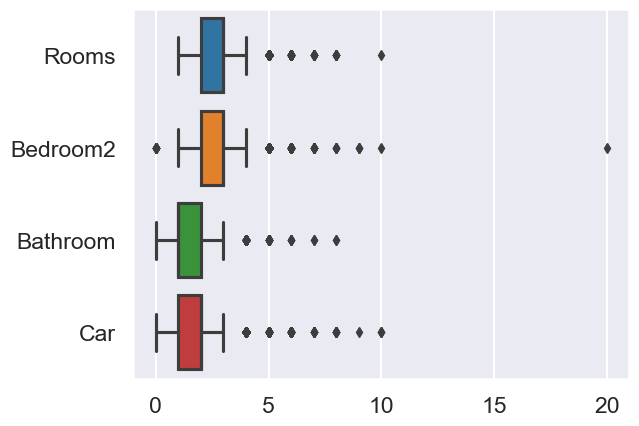

In [30]:
numeric_columns = [
    #"Postcode",
    "Price",
    #"CouncilArea",
    #"Suburb",
    "Rooms",
    'BuildingArea',
    #"Type",
    "Bedroom2",
    "Bathroom",
    "YearBuilt",
    "Car",
    'Distance',
    "Landsize",
]
# this will come in handy later

sns.boxplot(
    data=df_relevant_columns[["Rooms", "Bedroom2", "Bathroom", "Car"]], orient="h"
)  # 'landsize','YearBuilt' and 'Price' are Plotted separately for readability
plt.show()

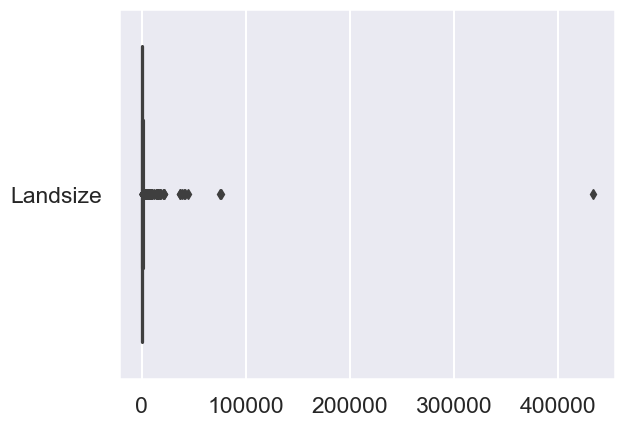

In [31]:
sns.boxplot(data=df_relevant_columns[["Landsize"]], orient="h")
plt.show()

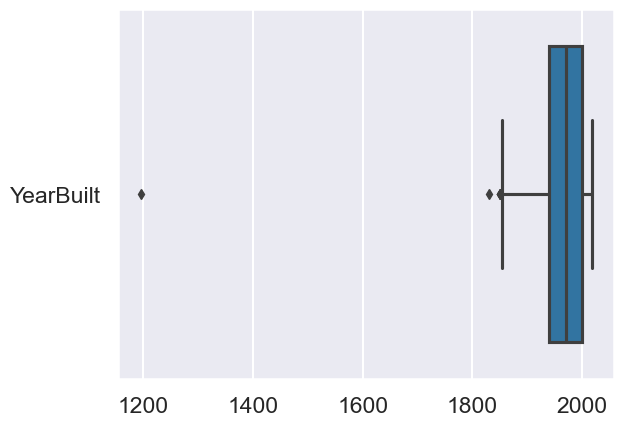

In [32]:
sns.boxplot(data=df_relevant_columns[["YearBuilt"]], orient="h")
plt.show()

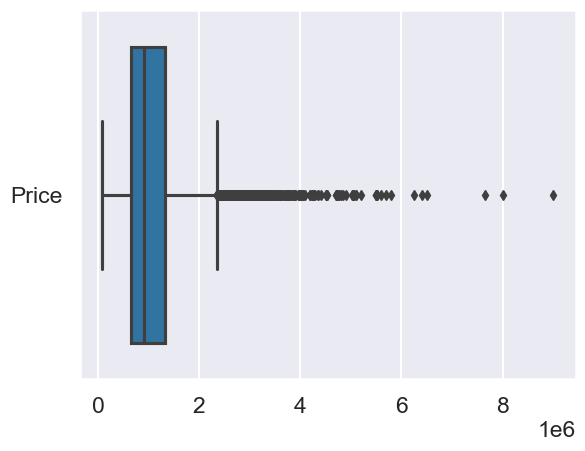

In [33]:
sns.boxplot(data=df_relevant_columns[["Price"]], orient="h")
plt.show()

In [34]:
df_relevant_columns[df_relevant_columns["Landsize"] == 433014.000000][
    "Price"
] 
# We can see that the maximun value of 'Landsize'
# has a price of just 2.7e6, which seems odd, but verifies that
# this variable is not really influencing the price.

11020    2700000.0
Name: Price, dtype: float64

Filtramos outliers, definiéndolos como:
- Criterio 1: los que están más allá de 3/2 de la distancia intercuartílica, respecto de el cuartil superior o inferior;
- Criterio 2: los que están más allá del percentil 1 o 99 (que para una distribución normal, serían los que están más allá de $3\sigma$).

Veamos primero cómo sería un filtrado general, sin tener en cuenta el tipo de la propiedad:

In [35]:
q_low = df_relevant_columns.select_dtypes(include=np.number)
q_low
print(df_relevant_columns)

       Postcode      Price CouncilArea         Suburb  Rooms  BuildingArea  \
0        3067.0  1480000.0       Yarra     Abbotsford      2           NaN   
1        3067.0  1035000.0       Yarra     Abbotsford      2          79.0   
2        3067.0  1465000.0       Yarra     Abbotsford      3         150.0   
3        3067.0   850000.0       Yarra     Abbotsford      3           NaN   
4        3067.0  1600000.0       Yarra     Abbotsford      4         142.0   
...         ...        ...         ...            ...    ...           ...   
13575    3150.0  1245000.0         NaN  Wheelers Hill      4           NaN   
13576    3016.0  1031000.0         NaN   Williamstown      3         133.0   
13577    3016.0  1170000.0         NaN   Williamstown      3           NaN   
13578    3016.0  2500000.0         NaN   Williamstown      4         157.0   
13579    3013.0  1285000.0         NaN     Yarraville      4         112.0   

      Type  Bedroom2  Bathroom  YearBuilt  Car  Distance  Lands

In [36]:
df_melb_filtered = df_relevant_columns

In [37]:
for column in numeric_columns:
    
    # Criteria 1:
    # we calculate the quantiles
    # q_low = df_relevant_columns[column].quantile(0.25)
    # q_hi = df_relevant_columns[column].quantile(0.75)
    # we calculate the boundaries
    # k = 1.5
    # lower_limit = q_low - k * (q_hi - q_low)
    # upper_limit = q_hi + k * (q_hi - q_low)
    # this one leaves me with 5531 rows.
    
    # Cirteria 2:
    lower_limit = df_relevant_columns[column].quantile(0.01)
    upper_limit = df_relevant_columns[column].quantile(0.99)
    # this one leaves me with 2271 rows.
    
    # we filter the df
    df_melb_filtered = df_melb_filtered.loc[
        (df_melb_filtered[column] < upper_limit)
        & (df_melb_filtered[column] > lower_limit)
    ]

df_melb_filtered

,Postcode,Price,CouncilArea,Suburb,Rooms,BuildingArea,Type,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize
11,3067.0,1350000.0,Yarra,Abbotsford,3,190.0,h,3.0,2.0,2005.0,2.0,2.5,214.0
20,3067.0,1330000.0,Yarra,Abbotsford,4,135.0,h,4.0,2.0,1900.0,2.0,2.5,780.0
24,3067.0,1100000.0,Yarra,Abbotsford,2,135.0,h,2.0,2.0,2013.0,1.0,2.5,124.0
27,3067.0,1447500.0,Yarra,Abbotsford,3,174.0,h,3.0,3.0,2012.0,1.0,2.5,166.0
29,3067.0,1135000.0,Yarra,Abbotsford,2,128.0,h,2.0,2.0,1920.0,2.0,2.5,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13548,3429.0,605000.0,NaN,Sunbury,3,229.0,h,3.0,2.0,1996.0,2.0,31.7,755.0
13568,3152.0,951000.0,NaN,Wantirna,4,200.0,h,4.0,2.0,1981.0,2.0,14.7,704.0
13571,3152.0,1330000.0,NaN,Wantirna South,4,191.0,h,4.0,2.0,1980.0,2.0,14.7,717.0
13573,3030.0,635000.0,NaN,Werribee,4,172.0,h,4.0,2.0,1980.0,1.0,14.7,662.0


In [38]:
df_melb_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 11 to 13576
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postcode      2271 non-null   float64
 1   Price         2271 non-null   float64
 2   CouncilArea   1993 non-null   object 
 3   Suburb        2271 non-null   object 
 4   Rooms         2271 non-null   int64  
 5   BuildingArea  2271 non-null   float64
 6   Type          2271 non-null   object 
 7   Bedroom2      2271 non-null   float64
 8   Bathroom      2271 non-null   float64
 9   YearBuilt     2271 non-null   float64
 10  Car           2271 non-null   float64
 11  Distance      2271 non-null   float64
 12  Landsize      2271 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 248.4+ KB


Llamativamente, el criterio 2 elimina una cantidad enorme de datos. Sin embargo, en vistas de que el tipo de propiedad presenta diferencias relevantes, resulta más adecuando hacer el filtrado con los outliers definidos según su categoría:

In [39]:
def remove_outliers_by_type(df):
    df_filtered = pd.DataFrame()  # Empty dataframe to store filtered data
    
    for t in ['h', 'u', 't']:
        df_selected_type = df.loc[df['Type'] == t].copy()  # Select rows of a certain type
        
        for column in df_selected_type.select_dtypes(include=np.number).columns:
            
            # Criteria 1:
            # we calculate the quantiles
            # q_low = df_selected_type[column].quantile(0.25)
            # q_hi = df_selected_type[column].quantile(0.75)
            # we calculate the boundaries
            # k = 1.5
            # lower_limit = q_low - k * (q_hi - q_low)
            # upper_limit = q_hi + k * (q_hi - q_low)
            # this one leaves me with 5803 rows.
            
            # Cirteria 2:
            lower_limit = df_selected_type[column].quantile(0.01)
            upper_limit = df_selected_type[column].quantile(0.99)
            # this one leaves me with 6162 rows.

            # we filter the df
            df_selected_type = df_selected_type.loc[
                (df_selected_type[column] <= upper_limit)
                & (df_selected_type[column] >= lower_limit)
            ]
        
        # Append filtered data of the current type to df_filtered
        df_filtered = pd.concat([df_filtered, df_selected_type])
    
    return df_filtered

df_melb_filtered = remove_outliers_by_type(df_relevant_columns)
df_melb_filtered

,Postcode,Price,CouncilArea,Suburb,Rooms,BuildingArea,Type,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize
1,3067.0,1035000.0,Yarra,Abbotsford,2,79.0,h,2.0,1.0,1900.0,0.0,2.5,156.0
2,3067.0,1465000.0,Yarra,Abbotsford,3,150.0,h,3.0,2.0,1900.0,0.0,2.5,134.0
4,3067.0,1600000.0,Yarra,Abbotsford,4,142.0,h,3.0,1.0,2014.0,2.0,2.5,120.0
6,3067.0,1876000.0,Yarra,Abbotsford,3,210.0,h,4.0,2.0,1910.0,0.0,2.5,245.0
7,3067.0,1636000.0,Yarra,Abbotsford,2,107.0,h,2.0,1.0,1890.0,2.0,2.5,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,3147.0,1650000.0,NaN,Ashburton,4,200.0,t,4.0,2.0,2005.0,1.0,10.2,338.0
13355,3165.0,1130000.0,NaN,Bentleigh East,4,183.0,t,4.0,2.0,2012.0,2.0,13.8,270.0
13373,3057.0,959000.0,NaN,Brunswick East,3,122.0,t,3.0,2.0,1998.0,1.0,4.0,138.0
13504,3149.0,1035000.0,NaN,Mount Waverley,3,138.0,t,3.0,2.0,2006.0,2.0,14.2,236.0


In [40]:
df_melb_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6162 entries, 1 to 13526
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postcode      6162 non-null   float64
 1   Price         6162 non-null   float64
 2   CouncilArea   5621 non-null   object 
 3   Suburb        6162 non-null   object 
 4   Rooms         6162 non-null   int64  
 5   BuildingArea  6162 non-null   float64
 6   Type          6162 non-null   object 
 7   Bedroom2      6162 non-null   float64
 8   Bathroom      6162 non-null   float64
 9   YearBuilt     6162 non-null   float64
 10  Car           6162 non-null   float64
 11  Distance      6162 non-null   float64
 12  Landsize      6162 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 674.0+ KB


Ahora, vemos que las filas que sobreviven son muchísimas más, confirmando que el mezclar
categorías está produciendo una definición poco confiable de outlier. Nos quedamos con el
criterio 2, pues este preserva una mayor cantidad de datos, y con el filtrado según tipo,
pues es lo más adecuado para nuestros datos.

# Inciso 2

Estas son todas las columnas de la base de datos AirBnB, para tenerlas a mano a la hora de decidir que columnas son interesantes.

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [41]:
# df_melb_filtered.join(df_airbnb_filtered, on=)

Defino las columnas intereseantes y me traigo el dataset.

In [42]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude','review_scores_rating','review_scores_value','minimum_nights', 'maximum_nights'
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)
    

C:\Users\joaqu\AppData\Local\Temp\ipykernel_4380\2579894469.py:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


In [53]:
airbnb_df.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_value', 'zipcode_int'],
      dtype='object')

In [56]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22895 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22895 non-null  object 
 5   suburb                 22872 non-null  object 
 6   state                  22834 non-null  object 
 7   zipcode                22749 non-null  float64
 8   latitude               22895 non-null  float64
 9   longitude              22895 non-null  float64
 10  price                  22895 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
 13  minimum_nights         22895 non-null  int64  
 14  maximum_nights         22895 non-null  int64  
 15  re

In [61]:
airbnb_df[['review_scores_rating','review_scores_value','minimum_nights','maximum_nights']].sample(20)

,review_scores_rating,review_scores_value,minimum_nights,maximum_nights
6183,99.0,10.0,1,90
10923,NaN,NaN,1,15
17788,20.0,2.0,1,1125
11256,100.0,10.0,1,60
561,NaN,NaN,2,5
531,96.0,10.0,3,1125
13112,NaN,NaN,1,1125
10924,94.0,10.0,1,1124
13623,NaN,NaN,7,14
5117,NaN,NaN,1,1125


convierto a numericos los valores de la columna zipcode

In [62]:
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [63]:
airbnb_df['zipcode_int'] = airbnb_df.zipcode.fillna(0).astype('int') #this is not neccesary

In [64]:
airbnb_df[airbnb_df['zipcode_int'] == 0].shape    #this is not neccesary

(146, 18)

Calculo la cantidad de elementos en la interseccion de ambos datasets y veo que un 99.95% de los datos de melbourne tienen a su par en el dataset de AirBnB.

In [65]:
intersection = np.intersect1d(
    airbnb_df.zipcode.values, df_melb_filtered.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(df_melb_filtered.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 165
Common zipcodes 163


In [66]:
print('Records in melbourne df with corresponding zipcode form Airbnb df',
      df_melb_filtered.Postcode.isin(intersection).sum() / len(df_melb_filtered))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      airbnb_df.zipcode.isin(intersection).sum() / len(airbnb_df))

Records in melbourne df with corresponding zipcode form Airbnb df 0.9995131450827653
Records in Airbnb df with corresponding zipcode form Sales df 0.8735094998908058


Ahora transformo el dataset, utilizando columnas relevantes, aplicando la funcion mean y count.

In [67]:
relevant_cols = ['price', 
                 'weekly_price', 
                 'monthly_price',
                 'review_scores_rating',
                 'minimum_nights',
                 'maximum_nights',
                 'zipcode']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price'               : ['mean', 'count'],
        'weekly_price'        : 'mean',
        'monthly_price'       : 'mean',
        'review_scores_rating': 'mean',
        'minimum_nights'      : 'mean',
        'maximum_nights'      : 'mean'})\
  .reset_index()
    

In [68]:
airbnb_price_by_zipcode

zipcode       price       weekly_price monthly_price  \
                    mean count         mean          mean   
0     2010.0   40.000000     1          NaN           NaN   
1     2134.0   50.000000     1          NaN           NaN   
2     2582.0  104.000000     1          NaN           NaN   
3     3000.0  150.504307  3367   918.738956   3407.204651   
4     3001.0  132.500000     2          NaN           NaN   
..       ...         ...   ...          ...           ...   
242   7367.0  230.000000     1          NaN           NaN   
243   8938.0  296.000000     1          NaN           NaN   
244   9004.0  226.000000     1          NaN           NaN   
245   9540.0  245.000000     1          NaN           NaN   
246  30122.0   75.000000     1   525.000000   2281.000000   

    review_scores_rating minimum_nights maximum_nights  
                    mean           mean           mean  
0                    NaN       1.000000     1125.00000  
1                    NaN       7.000000     1125.00000  
2                    NaN       1.000000     1125.00000  
3              92.775407       3.552124    30546.18117  
4              86.500000       1.500000     1125.00000  
..                   ...            ...            ...  
242                  NaN       1.000000       55.00000  
243                  NaN       5.000000       55.00000  
244                  NaN       1.000000       55.00000  
245                  NaN       1.000000       55.00000  
246           100.000000       6.000000      182.00000  

[247 rows x 8 columns]

Finalizo la transformacion.

In [73]:
relevant_cols = ['price', 
                 'weekly_price',
                 'monthly_price',
                 'review_scores_rating',
                 'review_scores_value',
                 'minimum_nights',
                 'maximum_nights',
                 'zipcode']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price'                : ['mean', 'count'],
        'weekly_price'         : 'mean',
        'monthly_price'        : 'mean',
        'review_scores_rating' : 'mean',
        'minimum_nights'       : 'mean',
        'maximum_nights'       : 'mean'})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean'               : 'airbnb_price_mean',
             'price count'              : 'airbnb_record_count',
             'weekly_price mean'        : 'airbnb_weekly_price_mean',
             'monthly_price mean'       : 'airbnb_monthly_price_mean',
             'review_scores_rating mean': 'airbnb_review_scores_rating_mean',
             'minimum_nights mean'      : 'airbnb_minimum_nights_mean',
             'maximum_nights mean'      : 'airbnb_maximum_nights_mean'})

## Option 2
# Pass as argument name the new name of the column, and as value a tuple where
# the first value is the original column and the second value is the operation.
# airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
#   .agg(airbnb_record_count=('price', 'count'),
#        airbnb_price_mean=('price', 'mean'),
#        airbnb_weekly_price_mean=('weekly_price', 'mean'),
#        airbnb_monthly_price_mean=('monthly_price', 'mean'))\
#   .reset_index()

airbnb_price_by_zipcode[:15]

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_review_scores_rating_mean,airbnb_minimum_nights_mean,airbnb_maximum_nights_mean
0,2010.0,40.000000,1,NaN,NaN,NaN,1.000000,1125.000000
1,2134.0,50.000000,1,NaN,NaN,NaN,7.000000,1125.000000
2,2582.0,104.000000,1,NaN,NaN,NaN,1.000000,1125.000000
3,3000.0,150.504307,3367,918.738956,3407.204651,92.775407,3.552124,30546.181170
4,3001.0,132.500000,2,NaN,NaN,86.500000,1.500000,1125.000000
5,3002.0,200.979695,197,956.379310,3712.714286,94.883562,4.989848,741.370558
6,3003.0,130.205993,267,760.200000,2629.500000,93.899038,3.202247,673.898876
7,3004.0,158.271978,728,1061.171429,3759.925926,93.636691,3.498626,798.605769
8,3006.0,188.851735,1268,1239.827273,4358.556701,94.168574,2.640379,736.365931
9,3008.0,177.011364,616,1025.275862,3222.833333,93.084168,3.008117,753.532468


Realizo el Merge.

In [ ]:
merged_sales_df = df_melb_filtered.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)

In [75]:
merged_sales_df.sample(50)

,Postcode,Price,CouncilArea,Suburb,Rooms,BuildingArea,Type,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_review_scores_rating_mean,airbnb_minimum_nights_mean,airbnb_maximum_nights_mean
3819,3166.0,1495000.0,NaN,Oakleigh,4,179.0,h,4.0,2.0,1950.0,1.0,12.3,581.0,3166.0,113.142857,70.0,459.285714,1536.166667,89.125000,7.728571,714.185714
290,3165.0,825000.0,Glen Eira,Bentleigh East,2,125.0,h,2.0,2.0,2008.0,1.0,13.9,176.0,3165.0,113.039216,51.0,563.200000,2032.800000,93.962963,5.509804,814.823529
5453,3041.0,750000.0,Moonee Valley,Strathmore,3,94.0,u,3.0,2.0,1970.0,2.0,8.2,288.0,3041.0,106.125000,8.0,350.000000,1500.000000,96.800000,1.625000,441.750000
4582,3122.0,806000.0,Boroondara,Hawthorn,2,64.0,u,2.0,1.0,1930.0,1.0,4.6,0.0,3122.0,180.570652,184.0,1726.416667,8158.900000,95.583333,3.260870,613.179348
5539,3141.0,1340000.0,Stonnington,South Yarra,2,133.0,u,2.0,2.0,1995.0,2.0,2.7,0.0,3141.0,157.912599,881.0,1040.403670,3417.811111,94.469630,6.447219,759.693530
1304,3032.0,1105000.0,Maribyrnong,Maribyrnong,3,142.0,h,3.0,1.0,1950.0,4.0,8.7,762.0,3032.0,111.613636,176.0,469.866667,1677.916667,94.294118,14.176136,733.835227
4940,3006.0,660000.0,Melbourne,Southbank,2,77.0,u,2.0,1.0,2000.0,1.0,1.2,0.0,3006.0,188.851735,1268.0,1239.827273,4358.556701,94.168574,2.640379,736.365931
538,3125.0,1255000.0,Monash,Burwood,4,210.0,h,4.0,2.0,2005.0,2.0,11.7,438.0,3125.0,88.147541,61.0,383.750000,870.000000,88.307692,2.606557,904.770492
641,3148.0,1415500.0,Monash,Chadstone,4,164.0,h,3.0,2.0,1950.0,1.0,13.6,1033.0,3148.0,79.500000,26.0,197.500000,1660.333333,95.571429,4.038462,3357.769231
862,3068.0,1210000.0,Yarra,Fitzroy North,2,118.0,h,2.0,1.0,1885.0,1.0,3.5,223.0,3068.0,126.012987,308.0,801.315789,2801.842105,95.827160,4.866883,606.366883


## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)